<a href="https://colab.research.google.com/github/daniel-arnobio/kaggle-house-price-competition/blob/main/house_price_xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from xgboost import XGBRegressor

In [ ]:
## Lendo os dados

df_train = pd.read_csv('/content/train.csv', index_col='Id')
dados_novos = pd.read_csv('/content/test.csv', index_col='Id')

In [ ]:
df_train.shape

(1460, 80)

In [ ]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [ ]:
df_train.shape

(1460, 80)

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
# 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',

In [ ]:
df_train = df_train[['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MiscVal', 'MoSold', 'MSSubClass', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold','SalePrice']]

In [ ]:
dados_novos = dados_novos[['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MiscVal', 'MoSold', 'MSSubClass', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']]


In [ ]:
df_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,EnclosedPorch,Fireplaces,FullBath,GrLivArea,HalfBath,KitchenAbvGr,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,3,0,0,2,1710,1,1,...,5,7,0,0,8,0,2003,2003,2008,208500
2,1262,0,0,3,0,1,2,1262,0,1,...,8,6,0,0,6,298,1976,1976,2007,181500
3,920,866,0,3,0,1,2,1786,1,1,...,5,7,0,0,6,0,2001,2002,2008,223500
4,961,756,0,3,272,1,1,1717,0,1,...,5,7,0,0,7,0,1915,1970,2006,140000
5,1145,1053,0,4,0,1,2,2198,1,1,...,5,8,0,0,9,192,2000,2000,2008,250000


## Variáveis numéricas

LotArea: Lot size in square feet;

YearBuilt: Original construction date;

1stFlrSF: First Floor square feet;

2ndFlrSF: Second floor square feet;

FullBath: Full bathrooms above grade;

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)









## Variáveis categóricas

'OverallCond': Rates the overall condition of the house  (ordinal)

Street: Type of road access to property (nominal)


In [ ]:
dados_novos.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
EnclosedPorch    0
Fireplaces       0
FullBath         0
GrLivArea        0
HalfBath         0
KitchenAbvGr     0
LotArea          0
LowQualFinSF     0
MiscVal          0
MoSold           0
MSSubClass       0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PoolArea         0
ScreenPorch      0
TotRmsAbvGrd     0
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
YrSold           0
dtype: int64

In [ ]:
dados_novos.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,EnclosedPorch,Fireplaces,FullBath,GrLivArea,HalfBath,KitchenAbvGr,...,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1461,896,0,0,2,0,0,1,896,0,1,...,0,6,5,0,120,5,140,1961,1961,2010
1462,1329,0,0,3,0,0,1,1329,1,1,...,36,6,6,0,0,6,393,1958,1958,2010
1463,928,701,0,3,0,1,2,1629,1,1,...,34,5,5,0,0,6,212,1997,1998,2010
1464,926,678,0,3,0,1,2,1604,1,1,...,36,6,6,0,0,7,360,1998,1998,2010
1465,1280,0,0,2,0,0,2,1280,0,1,...,82,5,8,0,144,5,0,1992,1992,2010


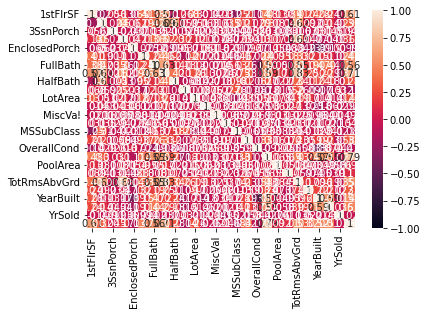

In [ ]:
# Correlação
sns.heatmap(df_train.corr(),vmin=-1,vmax=1,annot=True);

In [ ]:
X = df_train[['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MiscVal', 'MoSold', 'MSSubClass', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']]
y = df_train['SalePrice']

In [ ]:
# Separandos as variáveis categóricas da variável alvo

# Separe os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Codificando as variáveis categóricas

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
def metricas (y_test, y_train):
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import mean_absolute_error as MAE
  from sklearn.metrics import r2_score
  rmse = mean_squared_error(y_test, y_train, squared=False)
  MAE = MAE(y_test, y_train)
  r2 = r2_score(y_test, y_train)
  print(f'RMSE: {rmse}, MAE: {MAE}, R2: {r2}')

Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
modeloLR = LinearRegression()
modeloLR.fit(X_train, y_train)
predicao_modelo_lr = modeloLR.predict(X_test)

In [ ]:
metricas(y_test,predicao_modelo_lr)

RMSE: 36341.28907844733, MAE: 23796.67821643682, R2: 0.8107378121979404


In [ ]:
y_pred_kaggle = modeloLR.predict(dados_novos)

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
modeloDTR = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DTR = modeloDTR.predict(X_test)

In [ ]:
metricas(y_test, y_pred_DTR)

RMSE: 41844.777969752686, MAE: 28763.013698630137, R2: 0.7490739586877946



### Random Forest Regressor




In [ ]:
from sklearn.ensemble import RandomForestRegressor
modeloRFR = RandomForestRegressor(n_estimators=1000, min_samples_leaf =2).fit(X_train,y_train)
y_pred_RFR = modeloRFR.predict(X_test)

In [ ]:
metricas(y_test, y_pred_RFR)

RMSE: 29920.44160706068, MAE: 19102.361113850162, R2: 0.8717081116088325


In [ ]:
y_pred_kaggle = modeloRFR.predict(dados_novos)

In [ ]:
y_pred_kaggle.shape

(1459,)

In [ ]:
# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': dados_novos.index,
                       'SalePrice': y_pred_kaggle})
output.to_csv('submissionkaggle.csv', index=False)

XGBoost


In [ ]:
from xgboost import XGBRegressor
modeloXGB=XGBRegressor(n_estimators=450, learning_rate=0.15, n_jobs = 40, subsample = 0.6) 
modeloXGB.fit(X_train, y_train, early_stopping_rounds=20, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

predicao_modeloXGB=modeloXGB.predict(X_test)

[00:31:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
metricas(y_test, predicao_modeloXGB)

RMSE: 25669.408576250436, MAE: 17482.51144228025, R2: 0.9055732755637574


In [ ]:
erro = 25.669

In [ ]:
y_pred_kaggle = modeloXGB.predict(dados_novos)

In [ ]:
y_pred_kaggle.shape

(1459,)

In [ ]:
# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': dados_novos.index,
                       'SalePrice': y_pred_kaggle})
output.to_csv('submissionxgb.csv', index=False)